In [2]:
# importing required libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# version of numpy library
print("Version of numpy:", np.__version__)

Version of numpy: 1.20.1


In [4]:
# version of matplotlib library
import matplotlib

print("Version of matplotlib:", matplotlib.__version__)

Version of matplotlib: 3.3.4


In [5]:
# set random seed
np.random.seed(42)

In [6]:
# creating the input array
X = np.array([[1, 0, 0], [1, 0, 1], [0, 1, 0]])

print("Input:\n", X)

# shape of input array
print("\nShape of Input:", X.shape)

Input:
 [[1 0 0]
 [1 0 1]
 [0 1 0]]

Shape of Input: (3, 3)


In [12]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]]

Shape of Input Matrix: (3, 3)


In [8]:
# creating the output array
y = np.array([[1], [1], [0]])

print("Actual Output:\n", y)

# output in matrix form
y = y.T

print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


In [10]:
# initializing weight
# Shape of weights_input_hidden should number of neurons at input layer * number of neurons at hidden layer
inputLayer_neurons= X.shape[1]
hiddenLayer_neurons=3
outputLayer_neurons=1
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
print(weights_input_hidden)

# Shape of weights_hidden_output should number of neurons at hidden layer * number of neurons at output layer
weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))
print(weights_hidden_output)

[[0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]]
[[0.13949386]
 [0.29214465]
 [0.36636184]]


In [68]:
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape# We are using sigmoid as an activation function so defining the sigmoid function here

((3, 3), (3, 1))

In [14]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
# hidden layer activations

hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
print(hiddenLayer_linearTransform)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
print(hiddenLayer_activations)


[[0.83244264 1.26438766 0.18340451]
 [0.21233911 0.50356825 0.30424224]
 [0.18182497 0.79367786 0.52475643]]
[[0.69687117 0.77978049 0.54572303]
 [0.55288622 0.62329752 0.57547924]
 [0.54533142 0.68862049 0.6282593 ]]


In [18]:
# calculating the output
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
print(outputLayer_linearTransform)
output = sigmoid(outputLayer_linearTransform)
print(output)

[[0.45852062 0.5431519  0.47441843]]
[[0.61266317 0.63254532 0.616429  ]]


In [19]:
# output
output

array([[0.61266317, 0.63254532, 0.616429  ]])

In [73]:
# calculating error
error = np.square(y - output) / 2
error

array([[0.06816569, 0.06289716, 0.19007001]])

In [74]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [75]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [76]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

In [77]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_outputLayer_LinearTransform.shape, outputLayer_LinearTransform_wrt_weights_hidden_output.shape

((1, 3), (1, 3), (3, 3))

In [78]:
# shape of weights of output layer
weights_hidden_output.shape

(3, 1)

In [79]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
)

In [80]:
error_wrt_weights_hidden_output.shape

(3, 1)

In [81]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [82]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [83]:
# rate of change of Z2 w.r.t. hidden layer activations
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output

In [84]:
# rate of change of hidden layer activations w.r.t. Z1
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
)

In [85]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X

In [87]:
#checking the shapes of partial derivatives
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 3) (1, 3) (3, 1) (3, 3) (3, 3)


In [88]:
# shape of weights of hidden layer
weights_input_hidden.shape

(3, 3)

In [89]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)

In [90]:
error_wrt_weights_input_hidden.shape

(3, 3)

In [91]:
# defining the learning rate
lr = 0.01

In [92]:
# initial weights_hidden_output
weights_hidden_output

array([[0.50267902],
       [0.05147875],
       [0.27864646]])

In [93]:
# initial weights_input_hidden
weights_input_hidden

array([[0.3636296 , 0.97178208, 0.96244729],
       [0.2517823 , 0.49724851, 0.30087831],
       [0.28484049, 0.03688695, 0.60956433]])

In [94]:
# updating the weights of hidden layer
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

In [95]:
# updated weights_hidden_output
weights_hidden_output

array([[0.50267902],
       [0.05147875],
       [0.27864646]])

In [96]:
# updated weights_input_hidden
weights_input_hidden

array([[0.36382618, 0.97179908, 0.96252742],
       [0.25160199, 0.49723086, 0.30077903],
       [0.2849325 , 0.03689513, 0.60959654]])

In [99]:
losses = []
epochs = 1000
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.10704
Error at epoch 100 is 0.10576
Error at epoch 200 is 0.10480
Error at epoch 300 is 0.10403
Error at epoch 400 is 0.10337
Error at epoch 500 is 0.10279
Error at epoch 600 is 0.10224
Error at epoch 700 is 0.10173
Error at epoch 800 is 0.10122
Error at epoch 900 is 0.10072


In [100]:
# updated w_ih
weights_input_hidden

array([[0.53510012, 1.00288869, 1.05683508],
       [0.04722269, 0.45562362, 0.14713732],
       [0.36258971, 0.05155493, 0.64621402]])

In [101]:
# updated w_ho
weights_hidden_output

array([[0.58486654],
       [0.1344519 ],
       [0.51748777]])

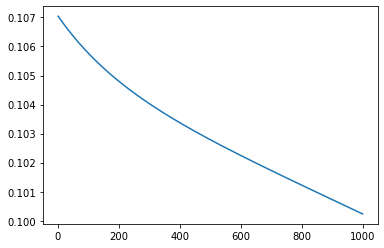

In [102]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [103]:
# final output from the model
output

array([[0.70080025, 0.72168737, 0.65911344]])

In [104]:
# actual target
y

array([[1, 1, 0]])

In [105]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

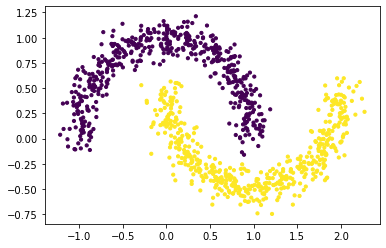

In [106]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

In [107]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [108]:
#Normalize the inputs
X -= X.min()
X /= X.max()

In [109]:
X.min(), X.max()

(0.0, 1.0)

In [110]:
np.unique(y)

array([0, 1], dtype=int64)

In [111]:
X.shape, y.shape

((1000, 2), (1000,))

In [112]:
X = X.T

y = y.reshape(1, -1)

In [113]:
X.shape, y.shape

((2, 1000), (1, 1000))

In [114]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.21725
Error at epoch 1000 is 0.02082
Error at epoch 2000 is 0.00891
Error at epoch 3000 is 0.00796
Error at epoch 4000 is 0.00723
Error at epoch 5000 is 0.00959
Error at epoch 6000 is 0.00702
Error at epoch 7000 is 0.00653
Error at epoch 8000 is 0.00663
Error at epoch 9000 is 0.00630


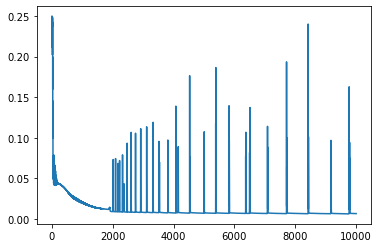

In [115]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [116]:
y[:, :5]

array([[1, 1, 1, 1, 0]], dtype=int64)

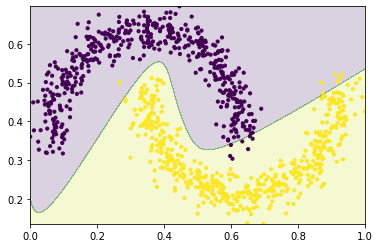

In [117]:
# Define region of interest by data limits
steps = 1000
x_span = np.linspace(X[0, :].min(), X[0, :].max(), steps)
y_span = np.linspace(X[1, :].min(), X[1, :].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
ax.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())